<a href="https://colab.research.google.com/github/AlbErtogArgAr1/PCA_Python_Project/blob/main/PCA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Here is my project using PCA to reduce the dimensionality of "Airline Passenger Satisfaction" data set. I search this data set from " https://www.mavenanalytics.io/data-playground "  which is a very good resource of free Data Sets. I choose this data set because it have 24 variables, so is enought large to apply PCA and I found interesting to study what are the main reasons to achieve passenger satisfaction. 

###I used this technique to remove correlated features, improves machine learning algorithm performance and reduce overfitting.

###The maths behind PCA technique are a bit more complex, but to summarise PCA find the best fitting line (or the best estimation in each use of case) by maximizing the sum of squared distances from the projected points to the origin. 

###The key aim of PCA is to reduce the number of variables of a data set, while preserving as much information as possible. So I'm going to estimate what the correct number of variables is before go on with my PCA analysis.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 

In [ ]:
Passenger_satisfaction = pd.read_csv("/content/drive/MyDrive/Portfolioproject/airline_passenger_satisfaction.csv") 

In [ ]:
Passenger_satisfaction.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,5,5,4,5,5,3,5,5,Satisfied
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,3,4,4,4,4,3,4,3,3,Satisfied
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,...,5,4,5,4,2,5,2,5,5,Satisfied


In [ ]:
Passenger_satisfaction.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In this case, in order to simplify the project, we are going to apply PCA only to the columns whose data type are floating or integer numbers, so we drop the rest of the features.

In [ ]:
Passenger_satisfaction = Passenger_satisfaction.drop(['Gender', 'Customer Type', 'Type of Travel', 'Class'], axis=1)

In [ ]:
Passenger_satisfaction

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,35,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,41,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,50,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,49,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,28,447,2,3.0,4,4,4,4,2,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,41,308,0,0.0,5,3,5,3,4,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,42,337,6,14.0,5,2,4,2,1,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,50,337,31,22.0,4,4,3,4,1,4,4,5,3,3,4,5,3,5,Satisfied


In [ ]:
Passenger_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 20 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Age                                     129880 non-null  int64  
 2   Flight Distance                         129880 non-null  int64  
 3   Departure Delay                         129880 non-null  int64  
 4   Arrival Delay                           129487 non-null  float64
 5   Departure and Arrival Time Convenience  129880 non-null  int64  
 6   Ease of Online Booking                  129880 non-null  int64  
 7   Check-in Service                        129880 non-null  int64  
 8   Online Boarding                         129880 non-null  int64  
 9   Gate Location                           129880 non-null  int64  
 10  On-board Service                        1298

Then we turn the target feature 'Satisfaction' into a numerical one. 


In [ ]:
Passenger_satisfaction = Passenger_satisfaction.replace({"Satisfaction" : {'Neutral or Dissatisfied': 0, 'Satisfied' : 1 }})

In [ ]:
Passenger_satisfaction

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0
1,2,35,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1
2,3,41,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1
3,4,50,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1
4,5,49,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,28,447,2,3.0,4,4,4,4,2,5,1,4,4,4,5,4,4,4,0
129876,129877,41,308,0,0.0,5,3,5,3,4,5,2,5,2,2,4,3,2,5,0
129877,129878,42,337,6,14.0,5,2,4,2,1,3,3,4,3,3,4,2,3,5,0
129878,129879,50,337,31,22.0,4,4,3,4,1,4,4,5,3,3,4,5,3,5,1


In [ ]:
import numpy as np 

In [ ]:
print(np.array(np.unique(Passenger_satisfaction.Satisfaction, return_counts=True)))

[[    0     1]
 [73452 56428]]


In the last line of code we could see that we have 73452 clients neutral or dissatisfied opposite to 56428 clients satisfied. The target feature is imbalanced, but not to a serious extent.

Firstly we train the Model using all the Features.

Before we perform PCA on the dataset, let’s use logistic regression to train a model using all the 20 features in the dataset and see how well it performs.

Before apply our logistic regression We fix the Nan, infinity and too large values.

In [ ]:
Passenger_satisfaction = Passenger_satisfaction.replace([np.inf, -np.inf], np.nan)
Passenger_satisfaction = Passenger_satisfaction.dropna()
Passenger_satisfaction= Passenger_satisfaction.reset_index()

Now we can apply our logistic regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = Passenger_satisfaction.iloc[:,:-1]      
y = Passenger_satisfaction.iloc[:,-1]
#---perform a split---
random_state = 12
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size = 0.3,
                     shuffle = True,
                     random_state=random_state)
#---train the model using Logistic Regression---
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)
#---evaluate the model---
log_reg.score(X_test,y_test)

0.6337168893350837

The accuracy for this model is: 0.6337168893350837

Training the Model using Reduced Features

Now we want to remove the features that are least correlated to 'Satisfaction' and also those features that exhibit multicollinearity. The aim is to reduce the number of features and see if the accuracy of the model can be improved.

Getting the Correlation Factors
Let’s first get the correlation of each feature with respect to the target ('Satisfacton'):

In [ ]:
df_corr = Passenger_satisfaction.corr()['Satisfaction'].abs().sort_values(ascending=False)
df_corr

Satisfaction                              1.000000
Online Boarding                           0.501620
In-flight Entertainment                   0.398334
Seat Comfort                              0.348576
On-board Service                          0.322329
Leg Room Service                          0.312557
Cleanliness                               0.306891
Flight Distance                           0.298206
In-flight Wifi Service                    0.283291
Baggage Handling                          0.248651
In-flight Service                         0.245027
Check-in Service                          0.237146
Food and Drink                            0.211164
Ease of Online Booking                    0.168704
Age                                       0.134001
Arrival Delay                             0.058275
Departure and Arrival Time Convenience    0.054457
Departure Delay                           0.051032
index                                     0.012990
ID                             

Then we fix our correlation level to 0.3 or higher and extract all those features that match.

In [ ]:
# get all the features that has at least 0.3 in correlation to the 
# target
features = df_corr[df_corr > 0.3].index.to_list()[1:]
features                          # without the 'Satisfaction' column

['Online Boarding',
 'In-flight Entertainment',
 'Seat Comfort',
 'On-board Service',
 'Leg Room Service',
 'Cleanliness']

Checking for MultiCollinearity
Let’s remove those features that exhibits multi-collinearity:

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(Passenger_satisfaction,features)

,VIF,Tolerance
Online Boarding,1.240738,0.805972
In-flight Entertainment,2.760189,0.362294
Seat Comfort,2.184252,0.457823
On-board Service,1.394942,0.716875
Leg Room Service,1.201541,0.832264
Cleanliness,2.541888,0.393408


A good practice would be remove those features that have VIF greater than 5, in our case we dont't have to remove any feature.

Training the Model
With the 20 features reduced to 6, let’s now train the model using logistic regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = Passenger_satisfaction.loc[:,features]            # get the reduced features in the 
                                  # dataframe
y = Passenger_satisfaction.loc[:,'Satisfaction']
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size = 0.3,
                     shuffle = True,                                                    
                     random_state=random_state)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test,y_test)

0.8071665765696193

By reducing our model from 20 features to 6 we improve our accuracy +17,35% approx.

(0.8071665765696193 - 0.6337168893350837)

Time to PCA!

Finally, let’s apply PCA to the dataset and see if a better model can be trained.

Performing Standard Scaling

Remember that PCA is sensitive to scaling? So the first step is to perform a standard scaling on the 20 features:

In [ ]:
from sklearn.preprocessing import StandardScaler
# get the features and label from the original dataframe
X = Passenger_satisfaction.iloc[:,:-1]
y = Passenger_satisfaction.iloc[:,-1]
# performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

Applying Principal Component Analysis (PCA)

Initially  we don't determine the number of components and set the parameter as none.

In [ ]:
from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_scaled)

PCA()

Now we print out the explained variances:

In [ ]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[1.93888688e+01 1.18896756e+01 1.11674311e+01 9.95202495e+00
 9.64356565e+00 6.12796055e+00 4.79087211e+00 4.65904907e+00
 4.41029274e+00 3.44694422e+00 2.65031561e+00 2.38710544e+00
 2.22492271e+00 1.83143612e+00 1.61636672e+00 1.46467076e+00
 1.25681973e+00 9.19059508e-01 1.72618564e-01 1.28456770e-31]



To visualize it in an easy way we print the cummulative variances:

In [ ]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 19.38886879  31.27854443  42.44597556  52.39800051  62.04156616
  68.16952671  72.96039881  77.61944788  82.02974063  85.47668484
  88.12700046  90.5141059   92.73902861  94.57046472  96.18683144
  97.6515022   98.90832193  99.82738144 100.         100.        ]



How we can interpret this cumulative variances? 

The first component alone captures about 19,39% variability in the data, the first two components capture about 31,28% variability in the data and so on.

In this case the first 10 components together capture about 85,48% variability in the data.

A visual way to view the cumulative variances is also to plot a scree plot.

The scree plot makes it easy for you to visualize the number of components that are needed to capture the various amount of variability in the data:

In [ ]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Explained variance (%)')

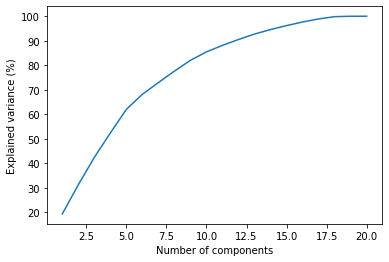

In [ ]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Let’s now apply PCA to find the desired number of components based on the desired explained variance, say 85,5%:

Cumulative Variances (Percentage):
[19.38886879 31.27854443 42.44597556 52.39800051 62.04156616 68.16952671
 72.96039881 77.61944788 82.02974063 85.47668484 88.12700046]
Number of components: 11


Text(0, 0.5, 'Explained variance (%)')

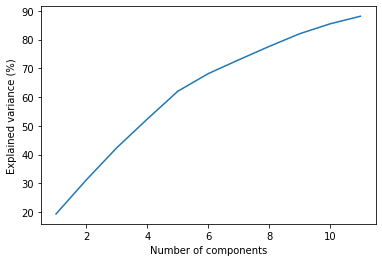

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.855)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

You can also find out the importance of each feature that contributes to each of the components using the components_ attribute of the pca object:

In [ ]:
pca_components = abs(pca.components_)
print(pca_components)

[[7.16323999e-02 7.16323999e-02 7.00139154e-02 1.24222733e-01
  3.89516702e-02 4.24459247e-02 9.48838043e-02 1.59046661e-01
  1.82864200e-01 2.85015465e-01 6.10859566e-02 2.75395150e-01
  3.43358559e-01 2.21763423e-01 3.48122126e-01 2.97800452e-01
  2.61833308e-01 2.25058948e-01 4.18234332e-01 2.57804531e-01]
 [8.93298111e-02 8.93298111e-02 1.34566638e-02 2.75115128e-02
  3.83056781e-02 3.96448967e-02 4.14851891e-01 5.34629579e-01
  5.97096290e-02 1.62874930e-01 4.29633891e-01 8.66917688e-02
  1.26883166e-01 2.65941523e-02 1.45851483e-01 1.25659449e-01
  8.78240439e-02 4.55724960e-01 1.56376510e-01 7.88467172e-02]
 [2.94837233e-01 2.94837233e-01 7.89706004e-02 2.33031439e-02
  6.15872607e-02 6.77121848e-02 6.34334508e-02 1.57278292e-02
  1.28039081e-01 1.28652748e-01 1.40125450e-02 3.13612646e-01
  3.07645074e-01 2.47462354e-01 3.22447438e-01 3.48893855e-01
  3.78608601e-01 1.28691974e-02 1.22955027e-01 3.67434803e-01]
 [4.10853184e-01 4.10853184e-01 6.72897739e-02 5.37250340e-02
  4.9

For curiosity, let’s print out the top 6 features that contributes the most to each of the 11 components:

In [ ]:
print('Top 6 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 6 values in each row
    temp = np.argpartition(-(pca_components[row]), 6)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:6]
    
    # print the top 6 feature names
    print(f'Component {row}: {Passenger_satisfaction.columns[indices].to_list()}')

Top 6 most important features in each component
Component 0: ['In-flight Entertainment', 'Cleanliness', 'Seat Comfort', 'Food and Drink', 'Online Boarding', 'On-board Service']
Component 1: ['Ease of Online Booking', 'In-flight Wifi Service', 'Gate Location', 'Departure and Arrival Time Convenience', 'Online Boarding', 'In-flight Entertainment']
Component 2: ['In-flight Service', 'Baggage Handling', 'Food and Drink', 'Cleanliness', 'On-board Service', 'Seat Comfort']
Component 3: ['Arrival Delay', 'Departure Delay', 'index', 'ID', 'Baggage Handling', 'In-flight Service']
Component 4: ['Departure Delay', 'Arrival Delay', 'index', 'ID', 'In-flight Service', 'On-board Service']
Component 5: ['Age', 'Flight Distance', 'Online Boarding', 'Gate Location', 'Food and Drink', 'Departure and Arrival Time Convenience']
Component 6: ['Check-in Service', 'Departure and Arrival Time Convenience', 'Age', 'In-flight Wifi Service', 'Leg Room Service', 'Gate Location']
Component 7: ['Check-in Service', 

Transforming all the 20 Columns to the 11 Principal Components

You can now transform the standardized data of the 20 columns in the dataset to the 11 principal components:

In [ ]:
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(129487, 11)
[[-1.95546313  0.42287475  1.8356203  ... -0.19326918  0.97968381
   0.62188954]
 [-1.94330951  1.32904574  0.40287242 ... -0.48473629  0.04161652
  -0.07522184]
 [-1.40889694 -1.63317628  2.81662994 ...  0.20622759 -0.20467948
   0.15459798]
 ...
 [ 0.1263421   1.12195668 -2.08043573 ... -0.74693747 -0.46485538
  -1.64941695]
 [-1.46933013 -0.54292507 -1.84269024 ... -1.95666829 -0.40045895
  -1.35681613]
 [ 2.08126154  0.29989435 -1.16867165 ... -0.27062167 -1.23224754
  -0.00983999]]


Creating a Machine Learning Pipeline

Let’s now create a machine learning pipeline so that we can formalize the entire process:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LogisticRegression()
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

We then split the dataset into training and testing sets and train the model using the training set:

In [ ]:
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state=random_state)
# train the model using the PCA components
log_regress_model.fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=11)),
                ('regressor', LogisticRegression())])

And let’s score the model to see how it performs:

In [ ]:
log_regress_model.score(X_test,y_test)

0.8235642391947898

###We improve our model accuracy 1,64% (0.8235642391947898 - 0.8071665765696193) using PCA.




###We trained 3 different models in these project:

###- Using all the 20 features. 
###- Using only 6 feature of the dataset.
###- Applying PCA to the dataset and then use the 11 components for training.

##Findings for the use of case:

##We improved our performance in a significant way by reducing from 20 features to 6. In this case by applying PCA model we don't upgrade our performance in a meaningful way, but we also improve and PCA analysis helps us to estimate the optimal number of components. 